## Probability Real Life Scenarios

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**There are two dices, one who rolls 6 the highest 'Dice A' and the other rolls 8 the highest 'Dice B', if we roll both the dices together then what is the probability of Dice B rolling the bigger no. than Dice A.**

In [9]:
result_list = []
for _ in range(100000):
    dice_A_roll = np.random.randint(1,7)
    dice_B_roll = np.random.randint(1,9)
    
    if dice_A_roll < dice_B_roll:
        result_list.append(1)
    else:
        result_list.append(0)
np.array(result_list).mean()        

0.56292

**There are two dices, one who rolls 6 the highest 'Dice A' and the other rolls 8 the highest 'Dice B', if we roll both the dices together then what is the probability of Dice A and Dice B added to 10.**

In [12]:
result_list = []
for _ in range(100000):
    dice_A_roll = np.random.randint(1,7)
    dice_B_roll = np.random.randint(1,7)
    
    if dice_A_roll + dice_B_roll == 10:
        result_list.append(1)
    else:
        result_list.append(0)
np.array(result_list).mean()

0.08352

**A stock price is given at t0 time if we have to find the stock price at 'T th' time given if the probability of stocks going up is 0.6 at 2% rate and going down at 3% then find the probability of crossing the minimum price limit in T th time.**

In [17]:
def s_direction(probability):
    uni_random_num = np.random.uniform(low = 0, high = 1.0)
    if uni_random_num < 0.6:
        return 1
    else:
        return 0

In [31]:
def get_stock_price_t10(s_price, probability, inc, dec, n_days):
    list_of_direction = [s_direction(probability) for i in range(n_days)]
    for i in list_of_direction:
        if i == 1:
             s_price *= inc
        else:
            s_price *= dec
    return s_price

In [86]:
possible_prices = np.array([get_stock_price_t10(s_price = 132, probability = 0.6, inc = 1.02, dec = 0.97, n_days = 10) for _ in range(10000)])


In [87]:
pd.DataFrame(possible_prices)

,0
0,153.019652
1,131.601821
2,125.150751
3,138.385420
4,138.385420
...,...
9995,145.518689
9996,119.015911
9997,153.019652
9998,145.518689


In [88]:
len([i for i in possible_prices if i > 143])/ len(possible_prices)

0.1654

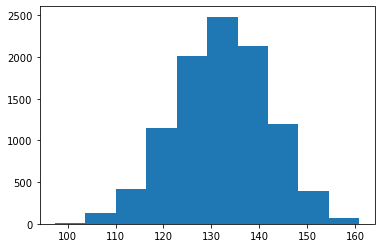

In [89]:
plt.hist(pd.DataFrame(possible_prices))
plt.show()

**There is a shipment coming and there are defects in that shipment we have a quality check section used to check the shipment. But we cannot check the whole shipment, we have to use a chunk to analyse that the shipment has any defected items or not so what should be the size of the chunk that 90% of the time we detect the defected shipment.**

In [80]:
def shipment(N, N_D):
    A = np.zeros(N)
    A[:N_D] = 1
    np.random.shuffle(A)
    return A

In [78]:
shipment(100, 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [79]:
def qa_selection(N, Q_S):
    A = np.zeros(N)
    A[:Q_S] = 1
    np.random.shuffle(A)
    return A

In [50]:
qa_selection(100, 4)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.])

In [81]:
def get_qc_success_prob(N, N_D, Q_S):
    qc_success_list = []
    for i in range(10000):
        if np.multiply(shipment(N, N_D), qa_selection(N, Q_S)).sum() > 0:
            qc_success_list.append(1)
        else:
            qc_success_list.append(0)
    return np.array(qc_success_list).mean()

In [65]:
get_qc_success_prob(N = 100, N_D = 6, Q_S = 16)

0.917

In [69]:
N = 100
N_D = 6
Q_S = 0
qa_success_prob = 0
while qa_success_prob < 0.9:
    qa_success_prob = get_qc_success_prob(N, N_D, Q_S)
    if qa_success_prob >= 0.9:
        break
    Q_S += 1

In [70]:
qa_success_prob, Q_S

(0.9222, 16)

In [84]:
# using for loop
N = 1000
N_D = 60
Q_S = 0
qa_success_prob = 0
dict_ = {}
for Q_S in range(10, 30):
    qa_success_prob = get_qc_success_prob(N, N_D, Q_S)
    dict_[Q_S] = qa_success_prob

In [85]:
dict_

{10: 0.4561,
 11: 0.4954,
 12: 0.5214,
 13: 0.5548,
 14: 0.5901,
 15: 0.6026,
 16: 0.6305,
 17: 0.6537,
 18: 0.6802,
 19: 0.6936,
 20: 0.7118,
 21: 0.7294,
 22: 0.7599,
 23: 0.7648,
 24: 0.7729,
 25: 0.7892,
 26: 0.8056,
 27: 0.8197,
 28: 0.8263,
 29: 0.8412}